# HÒA HỢP DỮ LIỆU: MỘT BẢN GIAO HƯỞNG CỦA PHÂN ĐOẠN, NỐI GHÉP, XOAY TRỤC VÀ HỢP NHẤT

## Khởi tạo ban đầu

In [1]:
import pandas as pd                   # thư viện phân tích dữ liệu
import matplotlib.pyplot as plt       # thư viện hiển thị dữ liệu
import seaborn as sns                 # thư viện hiển thị dữ liệu

## 1. Phân đoạn và Nối ghép: Biên đạo cùng Pandas

### 1.1. Chiến lược phân đoạn: Tứ phân vị của "SalePrice"

#### Thêm cột phân loại giá - Giá bán và danh mục tương ứng

In [2]:
import pandas as pd # thư viện phân tích dữ liệu

# Tải tập dữ liệu
Ames = pd.read_csv('../data/Ames.csv')

# Xác định các tứ phân vị
quantiles = Ames['SalePrice'].quantile([0.25, 0.5, 0.75])

# Hàm phân loại từng hàng theo giá bán
def categorize_by_price(row):
    if row['SalePrice'] <= quantiles.iloc[0]:
        return 'Thấp'
    elif row['SalePrice'] <= quantiles.iloc[1]:
        return 'Trung bình'
    elif row['SalePrice'] <= quantiles.iloc[2]:
        return 'Cao'
    else:
        return 'Cao cấp'

# Áp dụng hàm để tạo một cột mới
Ames['Price_Category'] = Ames.apply(categorize_by_price, axis=1)

# Hiển thị cột Giá bán và Phân loại giá
print(Ames[['SalePrice','Price_Category']])

      SalePrice Price_Category
0        126000           Thấp
1        139500     Trung bình
2        124900           Thấp
3        114000           Thấp
4        227000        Cao cấp
...         ...            ...
2574     121000           Thấp
2575     139600     Trung bình
2576     145000     Trung bình
2577     217500        Cao cấp
2578     215000        Cao cấp

[2579 rows x 2 columns]


### 1.2. Trực quan hóa xu hướng với Hàm Phân phối Tích lũy Thực nghiệm (ECDF)

#### Tạo biểu đồ ECDF - Biểu đồ ECDF

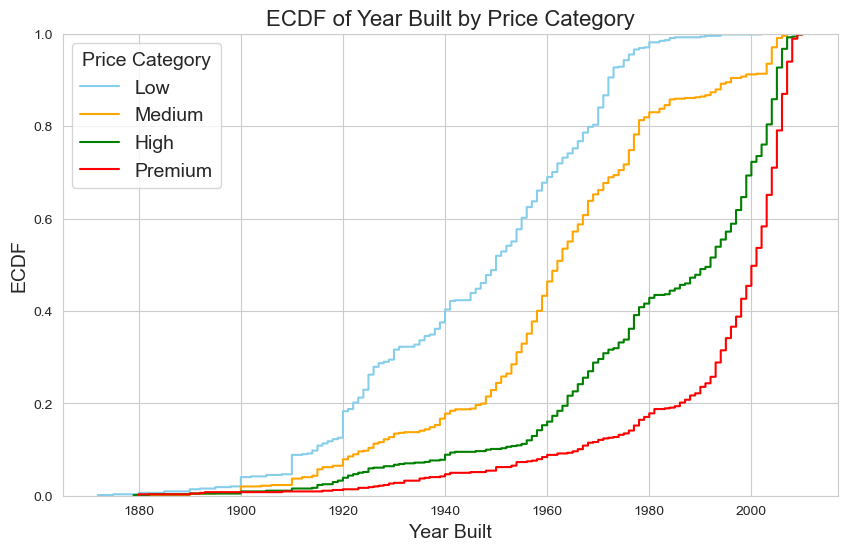

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Hàm phân loại từng hàng theo giá bán
def categorize_by_price(row):
    if row['SalePrice'] <= quantiles.iloc[0]:
        return 'Low'
    elif row['SalePrice'] <= quantiles.iloc[1]:
        return 'Medium'
    elif row['SalePrice'] <= quantiles.iloc[2]:
        return 'High'
    else:
        return 'Premium'

# Đọc tập dữ liệu
Ames = pd.read_csv('../data/Ames.csv')

# Xác định các tứ phân vị của giá bán
quantiles = Ames['SalePrice'].quantile([0.25, 0.5, 0.75])

# Áp dụng phân loại giá cho từng dòng trong tập dữ liệu
Ames['Price_Category'] = Ames.apply(categorize_by_price, axis=1)

# Chia tập dữ liệu ban đầu thành 4 DataFrame theo danh mục giá
low_priced_homes = Ames.query('Price_Category == "Low"')            # Nhà giá thấp
medium_priced_homes = Ames.query('Price_Category == "Medium"')      # Nhà giá trung bình
high_priced_homes = Ames.query('Price_Category == "High"')          # Nhà giá cao
premium_priced_homes = Ames.query('Price_Category == "Premium"')    # Nhà cao cấp

# Thiết lập kiểu hiển thị đồ thị cho giao diện thẩm mỹ
sns.set_style("whitegrid")

# Tạo một hình vẽ
plt.figure(figsize=(10, 6))

# Vẽ biểu đồ ECDF cho từng danh mục giá trên cùng một hình
sns.ecdfplot(data=low_priced_homes, x='YearBuilt', color='skyblue', label='Low')
sns.ecdfplot(data=medium_priced_homes, x='YearBuilt', color='orange', label='Medium')
sns.ecdfplot(data=high_priced_homes, x='YearBuilt', color='green', label='High')
sns.ecdfplot(data=premium_priced_homes, x='YearBuilt', color='red', label='Premium')

# Thêm tiêu đề và nhãn trục để làm rõ nội dung biểu đồ
plt.title('ECDF of Year Built by Price Category', fontsize=16)
plt.xlabel('Year Built', fontsize=14)
plt.ylabel('ECDF', fontsize=14)
plt.legend(title='Price Category', title_fontsize=14, fontsize=14)

# Hiển thị biểu đồ
plt.show()


### 1.3. Ghép chồng tập dữ liệu với Pandas.concat()

#### Sử dụng concat() để tạo DataFrame

In [4]:
# Thiết lập tùy chọn hiển thị: tối đa 8 cột và chiều rộng đầu ra 1000 ký tự
pd.set_option('display.max_columns',8)
pd.set_option('display.width', 1000)

# Ghép chồng các danh mục Giá thấp và Trung bình vào DataFrame "affordable_homes" (Nhà giá phải chăng)
affordable_homes = pd.concat([low_priced_homes, medium_priced_homes])

# Ghép chồng các danh mục Giá cao và Cao cấp vào DataFrame "luxury_homes" (Nhà sang trọng)
luxury_homes = pd.concat([high_priced_homes, premium_priced_homes])

print(affordable_homes)
print(luxury_homes)

            PID  GrLivArea  SalePrice  MSSubClass  ...            Prop_Addr   Latitude  Longitude Price_Category
0     909176150        856     126000          30  ...      436 HAYWARD AVE  42.018564 -93.651619            Low
2     911128020       1001     124900          30  ...         320 S 2ND ST  42.021548 -93.614068            Low
3     535377150       1039     114000          70  ...     1524 DOUGLAS AVE  42.037391 -93.612207            Low
6     902135020        936      93000          20  ...      212 10TH ST 210        NaN        NaN            Low
12    902204080        861      80000          30  ...     1102 CARROLL AVE  42.032167 -93.608797            Low
...         ...        ...        ...         ...  ...                  ...        ...        ...            ...
2558  535179020       1580     159500          20  ...          306 22ND ST  42.043760 -93.613907         Medium
2563  535402220       1734     159000          50  ...      201 E O NEIL DR  42.040102 -93.60937

## 2. Xoay trục và Hợp nhất: Khiêu vũ cùng Pandas

### 2.1. Tạo bản tóm tắt chi tiết với Pivot Tables

#### Sử dụng Pivot Table để tóm tắt số lượng nhà và diện tích trung bình và hạng sang

In [5]:
# Tạo pivot table với cả diện tích sinh hoạt trung bình và số lượng nhà
aggfunc = {'GrLivArea': 'mean', 'Fireplaces': 'count'}
pivot_affordable = affordable_homes.pivot_table(index='Fireplaces', aggfunc=aggfunc)
pivot_luxury = luxury_homes.pivot_table(index='Fireplaces', aggfunc=aggfunc)

# Đổi tên cột và nhãn chỉ mục riêng biệt
rename_rules = {'GrLivArea': 'AvLivArea', 'Fireplaces': 'HmCount'}

pivot_affordable.rename(columns=rename_rules, inplace=True)
pivot_affordable.index.name = 'Fire' # Đổi tên chỉ mục

pivot_luxury.rename(columns=rename_rules, inplace=True)
pivot_luxury.index.name = 'Fire' # Đổi tên chỉ mục

# Xem pivot table
print(pivot_affordable)
print(pivot_luxury)

      HmCount    AvLivArea
Fire                      
0         931  1159.050483
1         323  1296.808050
2          38  1379.947368
      HmCount    AvLivArea
Fire                      
0         310  1560.987097
1         808  1805.243812
2         157  1998.248408
3          11  2088.090909
4           1  2646.000000


#### Cú pháp pivot table nâng cao hơn - Số lượng nhà và diện tích sinh hoạt trung bình theo số lượng lò sưởi và danh mục giá

In [30]:
# Tạo pivot table với chỉ mục là số lượng lò sưởi (Fireplaces)
# và cột là danh mục giá (Price_Category)
pivot = Ames.pivot_table(index="Fireplaces",  # Chỉ mục: Số lượng lò sưởi
                         columns="Price_Category",  # Cột: Danh mục giá nhà
                         aggfunc={'GrLivArea': 'mean',  # Tính trung bình diện tích sinh hoạt
                                  'Fireplaces': 'count'})  # Đếm số lượng nhà trong mỗi nhóm

# Hiển thị pivot table
print(pivot)

               Fireplaces                          GrLivArea                                       
Price_Category       High    Low Medium Premium         High          Low       Medium      Premium
Fireplaces                                                                                         
0                   228.0  520.0  411.0    82.0  1511.912281  1081.496154  1257.172749  1697.439024
1                   357.0  116.0  207.0   451.0  1580.644258  1184.112069  1359.961353  1983.031042
2                    52.0    9.0   29.0   105.0  1627.384615  1184.888889  1440.482759  2181.914286
3                     5.0    NaN    NaN     6.0  1834.600000          NaN          NaN  2299.333333
4                     NaN    NaN    NaN     1.0          NaN          NaN          NaN  2646.000000


### 2.2. Hướng tới hiểu biết sâu hơn: Tận dụng Pandas.merge() để phân tích so sánh

#### Outer join sử dụng hàm merge() - Số lượng nhà và diện tích sinh hoạt trung bình theo số lượng lò sưởi

In [32]:
# Thực hiện outer join để kết hợp dữ liệu từ hai pivot table của nhà giá phải chăng và sang trọng
# Ghép nối dựa trên cột 'Fire' (số lượng lò sưởi), giữ lại tất cả giá trị từ cả hai bảng
# Thêm hậu tố '_aff' cho dữ liệu từ pivot_affordable và '_lux' cho dữ liệu từ pivot_lux
# Điền giá trị NaN bằng 0 để đảm bảo dữ liệu đầy đủ
pivot_outer_join = pd.merge(pivot_affordable, pivot_luxury, on='Fire', how='outer',
                            suffixes=('_aff', '_lux')).fillna(0)

# In kết quả của outer join
print(pivot_outer_join)

      HmCount_aff  AvLivArea_aff  HmCount_lux  AvLivArea_lux
Fire                                                        
0           931.0    1159.050483          310    1560.987097
1           323.0    1296.808050          808    1805.243812
2            38.0    1379.947368          157    1998.248408
3             0.0       0.000000           11    2088.090909
4             0.0       0.000000            1    2646.000000


#### Inner join sử dụng hàm merge() - Kết quả của inner join cho thấy số lượng hàng ít hơn

In [40]:
# Thực hiện inner join để kết hợp dữ liệu từ hai pivot table của nhà giá phải chăng và sang trọng
# Chỉ giữ lại các hàng có số lượng lò sưởi ('Fire') xuất hiện trong cả hai bảng
# Thêm hậu tố '_aff' cho dữ liệu từ pivot_affordable và '_lux' cho dữ liệu từ pivot_lux
pivot_inner_join = pd.merge(pivot_affordable, pivot_luxury, on='Fire', how='inner',
                            suffixes=('_aff', '_lux'))

# In kết quả của inner join
print(pivot_inner_join)

   level_0_aff  index_aff  Fire  HmCount_aff  ...  level_0_lux  index_lux  HmCount_lux  AvLivArea_lux
0            0          0     0          931  ...            0          0          310    1560.987097
1            1          1     1          323  ...            1          1          808    1805.243812
2            2          2     2           38  ...            2          2          157    1998.248408

[3 rows x 9 columns]


#### Cross join sử dụng hàm merge() - Kết quả của cross join là một tích Descartes

In [44]:
# Tạo pivot table với diện tích sinh hoạt trung bình và số lượng nhà theo số lượng lò sưởi
aggfunc = {'GrLivArea': 'mean', 'Fireplaces': 'count'}
pivot_affordable = affordable_homes.pivot_table(index='Fireplaces', aggfunc=aggfunc)
pivot_luxury = luxury_homes.pivot_table(index='Fireplaces', aggfunc=aggfunc)

# Đổi tên cột và chỉ mục
rename_rules = {'GrLivArea': 'AvLivArea', 'Fireplaces': 'HmCount'}
pivot_affordable.rename(columns=rename_rules, inplace=True)
pivot_affordable.index.name = 'Fire'
pivot_luxury.rename(columns=rename_rules, inplace=True)
pivot_luxury.index.name = 'Fire'

# Đặt lại chỉ mục để thực hiện cross join
pivot_affordable.reset_index(inplace=True)
pivot_luxury.reset_index(inplace=True)

# Thực hiện cross join để tạo tất cả các kết hợp có thể giữa hai bảng
pivot_cross_join = pd.merge(pivot_affordable, pivot_luxury, how='cross',
                            suffixes=('_aff', '_lux')).round(2)

# In kết quả của cross join
print(pivot_cross_join)

    Fire_aff  HmCount_aff  AvLivArea_aff  Fire_lux  HmCount_lux  AvLivArea_lux
0          0          931        1159.05         0          310        1560.99
1          0          931        1159.05         1          808        1805.24
2          0          931        1159.05         2          157        1998.25
3          0          931        1159.05         3           11        2088.09
4          0          931        1159.05         4            1        2646.00
5          1          323        1296.81         0          310        1560.99
6          1          323        1296.81         1          808        1805.24
7          1          323        1296.81         2          157        1998.25
8          1          323        1296.81         3           11        2088.09
9          1          323        1296.81         4            1        2646.00
10         2           38        1379.95         0          310        1560.99
11         2           38        1379.95         1  

### 2.3. Rút ra hiểu biết từ dữ liệu đã hợp nhất

Mỗi loại join được trình bày ở trên giúp làm sáng tỏ các khía cạnh khác nhau của thị trường nhà ở:
+ Outer join tiết lộ phạm vi rộng nhất của các bất động sản, nhấn mạnh sự đa dạng trong các tiện nghi như số lượng lò sưởi trên tất cả các mức giá.
+ Inner join tinh chỉnh góc nhìn của bạn, tập trung vào những so sánh trực tiếp khi các căn nhà giá phải chăng và nhà sang trọng có cùng số lượng lò sưởi, cung cấp một bức tranh rõ ràng hơn về các tiêu chuẩn thị trường.
+ Cross join cung cấp một danh sách toàn diện về tất cả các kết hợp tính năng có thể có, hữu ích khi bạn cần tạo ra tập hợp đầy đủ các điều kiện có thể xảy ra.


Sau khi thực hiện các phép merge, bạn nhận thấy rằng đối với các căn nhà giá phải chăng:
+ Các ngôi nhà không có lò sưởi có diện tích sinh hoạt trung bình khoảng 1159 feet vuông và chiếm tỷ lệ lớn nhất.
+ Khi số lượng lò sưởi tăng lên một, diện tích sinh hoạt trung bình tăng lên khoảng 1296 feet vuông, cho thấy sự gia tăng đáng kể về không gian sống.
+ Những ngôi nhà có hai lò sưởi, dù ít hơn về số lượng, nhưng lại có diện tích sinh hoạt trung bình lớn hơn khoảng 1379 feet vuông, nhấn mạnh một xu hướng rằng các tiện ích bổ sung thường đi kèm với không gian sống rộng rãi hơn.


Ngược lại, đối với các căn nhà sang trọng, bạn quan sát thấy:
+ Phân khúc nhà sang trọng có điểm khởi đầu với các ngôi nhà không có lò sưởi, với diện tích trung bình khoảng 1560 feet vuông, lớn hơn đáng kể so với các ngôi nhà giá phải chăng.
+ Sự gia tăng diện tích sinh hoạt trở nên rõ ràng hơn trong các căn nhà sang trọng, khi số lượng lò sưởi tăng lên. Các ngôi nhà có một lò sưởi có diện tích trung bình khoảng 1805 feet vuông.
+ Những căn nhà có hai lò sưởi tiếp tục khuếch đại xu hướng này, với diện tích sinh hoạt trung bình gần 1998 feet vuông.
+ Các căn nhà có ba đến bốn lò sưởi, dù không nhiều, nhưng có diện tích sinh hoạt lớn hơn nữa, đạt đỉnh ở 2646 feet vuông.


Những quan sát này mang đến một cái nhìn hấp dẫn về cách các tiện nghi như lò sưởi không chỉ góp phần tăng giá trị của một ngôi nhà mà còn là dấu hiệu của những không gian sống rộng lớn hơn, đặc biệt khi bạn chuyển từ phân khúc giá phải chăng sang phân khúc sang trọng trên thị trường nhà ở.

## Kết thúc